In [1]:
# [점진적학습]
# - 데이터가 수진될때 마다 학습을 계속이어나가는 훈련방식 
# - 대표적인 점진적 학습 알고리즘 : 확률적 경사하강법 (SDG)

# [확률적 경사하강법(SDG)]
# - 경사 ;기울기 
# - 하강법 : 내려가는 방법 
# - 원하는 '지점'에 도달하기 위해 가장 가파른 경사를 따라 '내려 가는 방법'을 찾는 알고리즘 
# - 확률적'(무직위/랜덤)': 알고리즘이 알아서 내려가는 경사의 위차와 방법을 찾음 
# - 훈련데이터의 전체 특성들 중에서 하나씩 램던하게 선택하여 가장 가파른 길을 찾음
# 원하는 지점 -> U 그래프 

# [획률적 경사하강법 순서]
# - 훈련 데이터 에서 램덤하게 하나의 특성을 선택 
# - 선택한 특성을 이용해서 경사를 조금씩 (아주 조금씩) 체크 (빠른길)하면서 내려간다 
# - 지점까지 내려갈 수 있을 때 까지 내려간다 
# - 훈련데이터에서 다른 독립변수(특성)를 랜덤하게 선택하여 또 다시 위에서 부터 시작 
# 각가의 독립변수를 여러번 내려가게 한다 -> 빠른 길을 찾아서 

In [3]:
# 07_fish.csv 데이터 읽어들이고 정보확인하기 
import pandas as pd 
fish = pd.read_csv("./data/07_fish.csv")
fish.info()
fish.describe()
# 특성 (컬럼, 열, 항복, 변수) 확인 
# Species Weight Length Diagonal Height Width

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
# 데이터 전처리 작업 후 아래 과정 진행 
# 분리전에 무조건 전처리 하고 해야한다 -> 같은 위치의 값을 유지하기 위함 
# 독립,종속 분리 
fish_target = fish['Species'].to_numpy()
fish_input = fish[["Weight",'Length','Diagonal','Height','Width']].to_numpy()

print(fish_target.shape, fish_input.shape)

(159,) (159, 5)


In [9]:
#훈련, 테스트 분리 
from sklearn.model_selection import train_test_split
train_input, test_input,train_target, test_target = train_test_split(fish_input, fish_target, test_size = 0.25, random_state = 42)
print(train_input.shape, train_target.shape)
print (test_input.shape, test_target.shape)

(119, 5) (119,)
(40, 5) (40,)


In [10]:
# 정규화 
from sklearn.preprocessing import StandardScaler

#함수 불러오기 
ss = StandardScaler()

# 스스로 표준 점수 생성
ss.fit(train_input)

#훈련데이터를 표준 점수로 변환하기 
train_scaled = ss.transform(train_input)

#테스트데이터를 표준점수로 변환하기 
test_scaled = ss.transform(test_input)

print(train_scaled.shape, test_scaled.shape)

(119, 5) (40, 5)


# 획률적 경사하강법을 이용한 분류모델(SGDclassifier)

In [22]:
# 라이브러리 불러들이기 
from sklearn.linear_model import SGDClassifier

# 훈련모델 생성 
# [loss : 손실함수] 
# - 조금씩 내려오면서 손실이 작은 쪽을 찾아서 내려오기 위한 방법을 지정 
# - 학습 모델이 알아서 계산하고 처리함 
# - 분류 결과에 만족할 때까지 내려간다 
# - log(logistic의 약자): 로지스틱 손실함수 (이진분류에 사용)
# 로지스틱 : 이진분류 사용 -> 변수 여러개인데 왜 이진분류? 
# -> 독립변수 하나에 관해 경사 선택하는 것이다 ( 두개의 갈림길의 손실을 체크)
# max_iter : 10 -> 각 변수별로 내려올 횟수 
sc = SGDClassifier(loss="log", max_iter = 10, random_state = 42)

# 훈련시키기 
sc.fit(train_scaled, train_target)

#검증하기 
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

# 과소적합 발생 -> 하이퍼파라미터 조정하니 과소적합 줄임 -> 정확도 떨어짐 


0.773109243697479
0.775


C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [32]:
# 점진적으로 기존 훈련에 이어서 계속 훈련하기 
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

0.8487394957983193
0.9


## 반복횟수(max_iter or에 포크_

In [48]:
import numpy as np
sc = SGDClassifier(loss = "log", random_state = 42 )

# 종확오룰 담을 리스트 변수 생성 
train_score = []
test_score = []
# 종속변수 데이터 추출하여 변수에 붇기 
classes = np.unique(train_target)
# 300qjs(0~299) 강제로 훈련 수행하면서 훈련 및 테스트 정확도 조회하기 
for _ in range(0,300) : 
    # 최조 반복에 사용한 훈련 이어서 계속 훈련하기 
    sc.partial_fit(train_scaled, train_target, classes=classes)
    # 훈련 및 테스트 정확도 리스트 변수에 담기 
    train_score.append (sc.score(train_scaled,train_target))
    test_score.append (sc.score(test_scaled, test_target))

In [49]:
print(len(train_score), len(test_score))

300 300


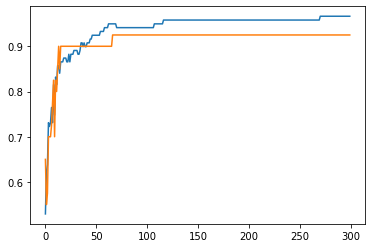

In [54]:
#반복횟수별로 정확도 확인하기 (반복 횟수 지점 찾기)
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)


In [56]:
# tol = None : SGD 는 어느정도 지점에 도달해다고 판단하면 반복을 강제 종료 시킨다 
# 우리가 지정한 max_iter만큼 무조건 반복을 수행하기 위하여 설정하는 값 
sc = SGDClassifier(loss="log", max_iter = 100, tol=None, random_state = 42)

# 훈련시키기 
sc.fit(train_scaled, train_target)

#검증하기 
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925


In [ ]:
# 분류모델의시작 => 트리기반 